In [1]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("../scraper/arxiv_physics_2025-07-02_16-53-00.csv")

In [3]:
target_categories = ["hep-th", "hep-ph", "gr-qc"]
X = df['title']
y = df['primary_category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=21, stratify=y
)

In [4]:
vectorizer = TfidfVectorizer(
    max_features=10000,  
    ngram_range=(1, 2), 
    stop_words='english'
)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [5]:
svm_clf = LinearSVC(class_weight='balanced', max_iter=5000, random_state=42)
svm_clf.fit(X_train_tfidf, y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,verbose,0
,random_state,42


In [6]:
y_pred = svm_clf.predict(X_test_tfidf)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred))

SVM Classification Report:
              precision    recall  f1-score   support

       gr-qc       0.79      0.87      0.83        97
      hep-ph       0.85      0.89      0.87       117
      hep-th       0.81      0.69      0.74        89

    accuracy                           0.82       303
   macro avg       0.82      0.81      0.81       303
weighted avg       0.82      0.82      0.82       303



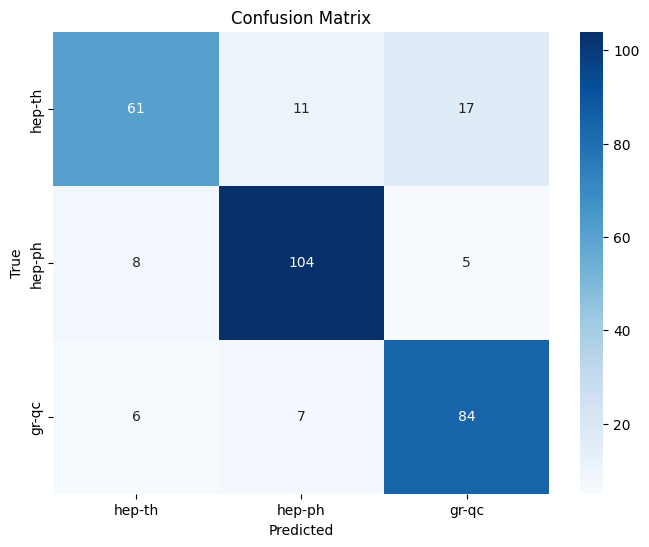

In [7]:
cm = confusion_matrix(y_test, y_pred, labels=target_categories)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=target_categories, yticklabels=target_categories, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [8]:
def show_top_features_per_class(vectorizer, svm_clf, categories, top_n=10):
    feature_names = np.array(vectorizer.get_feature_names_out())
    for i, category in enumerate(categories):
        coef = svm_clf.coef_[i]
        top_positive_idx = np.argsort(coef)[-top_n:]
        top_negative_idx = np.argsort(coef)[:top_n]

        print(f"\nCategory: {category}")
        print(f"Top {top_n} positive features:")
        print(feature_names[top_positive_idx][::-1])

        print(f"Top {top_n} negative features:")
        print(feature_names[top_negative_idx])

In [9]:
show_top_features_per_class(vectorizer, svm_clf, target_categories, top_n=15)


Category: hep-th
Top 15 positive features:
['gravity' 'black' 'gravitational' 'cosmology' 'einstein' 'hole'
 'black hole' 'gravitational wave' 'dark energy' 'relativity' 'stars'
 'compact' 'wave' 'dynamical' 'framework']
Top 15 negative features:
['holographic' 'primordial' 'neutrino' 'primordial black' 'near' 'charge'
 'qcd' 'decay' 'holography' 'decays' 'jt' 'invariant' 'micro black'
 'hole dark' 'amplitudes']

Category: hep-ph
Top 15 positive features:
['neutrino' 'decays' 'quark' 'jet' 'qcd' 'decay' 'primordial' 'higgs'
 'flavor' 'matter' 'primordial black' 'axion' 'production' 'lhc'
 'dark matter']
Top 15 negative features:
['gravity' 'gravitational' 'black' 'dark energy' 'ads' 'quantum' 'hole'
 'black hole' 'vacuum' 'field' 'holography' 'theory' 'spacetime'
 'cosmology' 'higher']

Category: gr-qc
Top 15 positive features:
['holographic' 'holography' 'ads' 'flat' 'symmetries' 'string' 'hole dark'
 'micro black' 'islands' 'bps' 'abelian' 'integrable' 'bootstrap' 'jt'
 'finite']
To

In [10]:
def plot_wordcloud_for_class(vectorizer, clf, category_index, category_name, max_words=100):
    feature_names = np.array(vectorizer.get_feature_names_out())
    coef = clf.coef_[category_index]

    word_weights = {feature_names[i]: coef[i] for i in range(len(coef)) if coef[i] > 0}

    wc = WordCloud(width=800, height=400, background_color='white', max_words=max_words)
    wc.generate_from_frequencies(word_weights)

    plt.figure(figsize=(10, 5))
    plt.title(f"Word Cloud for category: {category_name}", fontsize=16)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

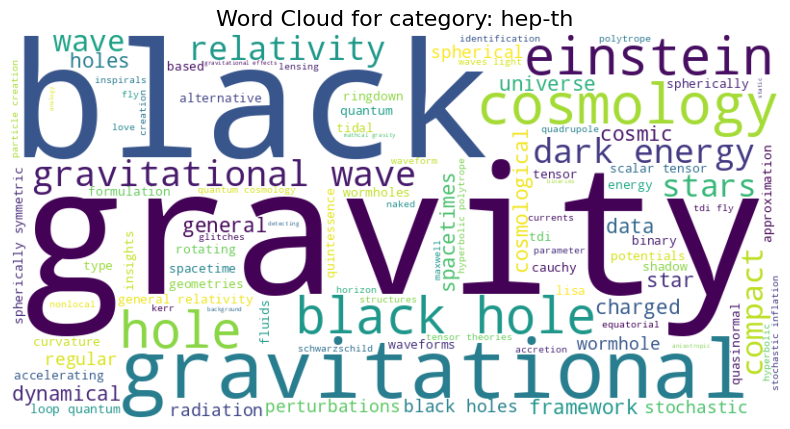

In [11]:
plot_wordcloud_for_class(vectorizer, svm_clf, 0, target_categories[0])